# Hiyerarşik Kümeleme

In [47]:
# Hiyerarşik yöntemlerde küme sayısına dendograma bakarak karar verilir. Bölümleyici ve Birleştirici (Aglomeratif)
# olarak ikiye ayrılır. Biz aglomeratif örneği yapacağız.

In [48]:
# Hiyerarşik olmayan yöntemlerde(kmeans vs) kümeleme yapmadan karar verilmektedir.

In [49]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import scipy as sp

In [50]:
df = pd.read_csv("Cust_Segmentation.csv").copy()
df.index = df.iloc[:,0]
df = df.drop(['Customer Id','Age','Years Employed','Card Debt','Other Debt','Defaulted','Address','Edu'], axis = 1)
df.head()

,Income,DebtIncomeRatio
Customer Id,,
1,19,6.3
2,100,12.8
3,57,20.9
4,19,6.3
5,253,7.2


In [51]:
del df.index.name

In [52]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")
hc_average = linkage(df, "average")
hc_single = linkage(df,"single") # metodlar dahil edildi. 

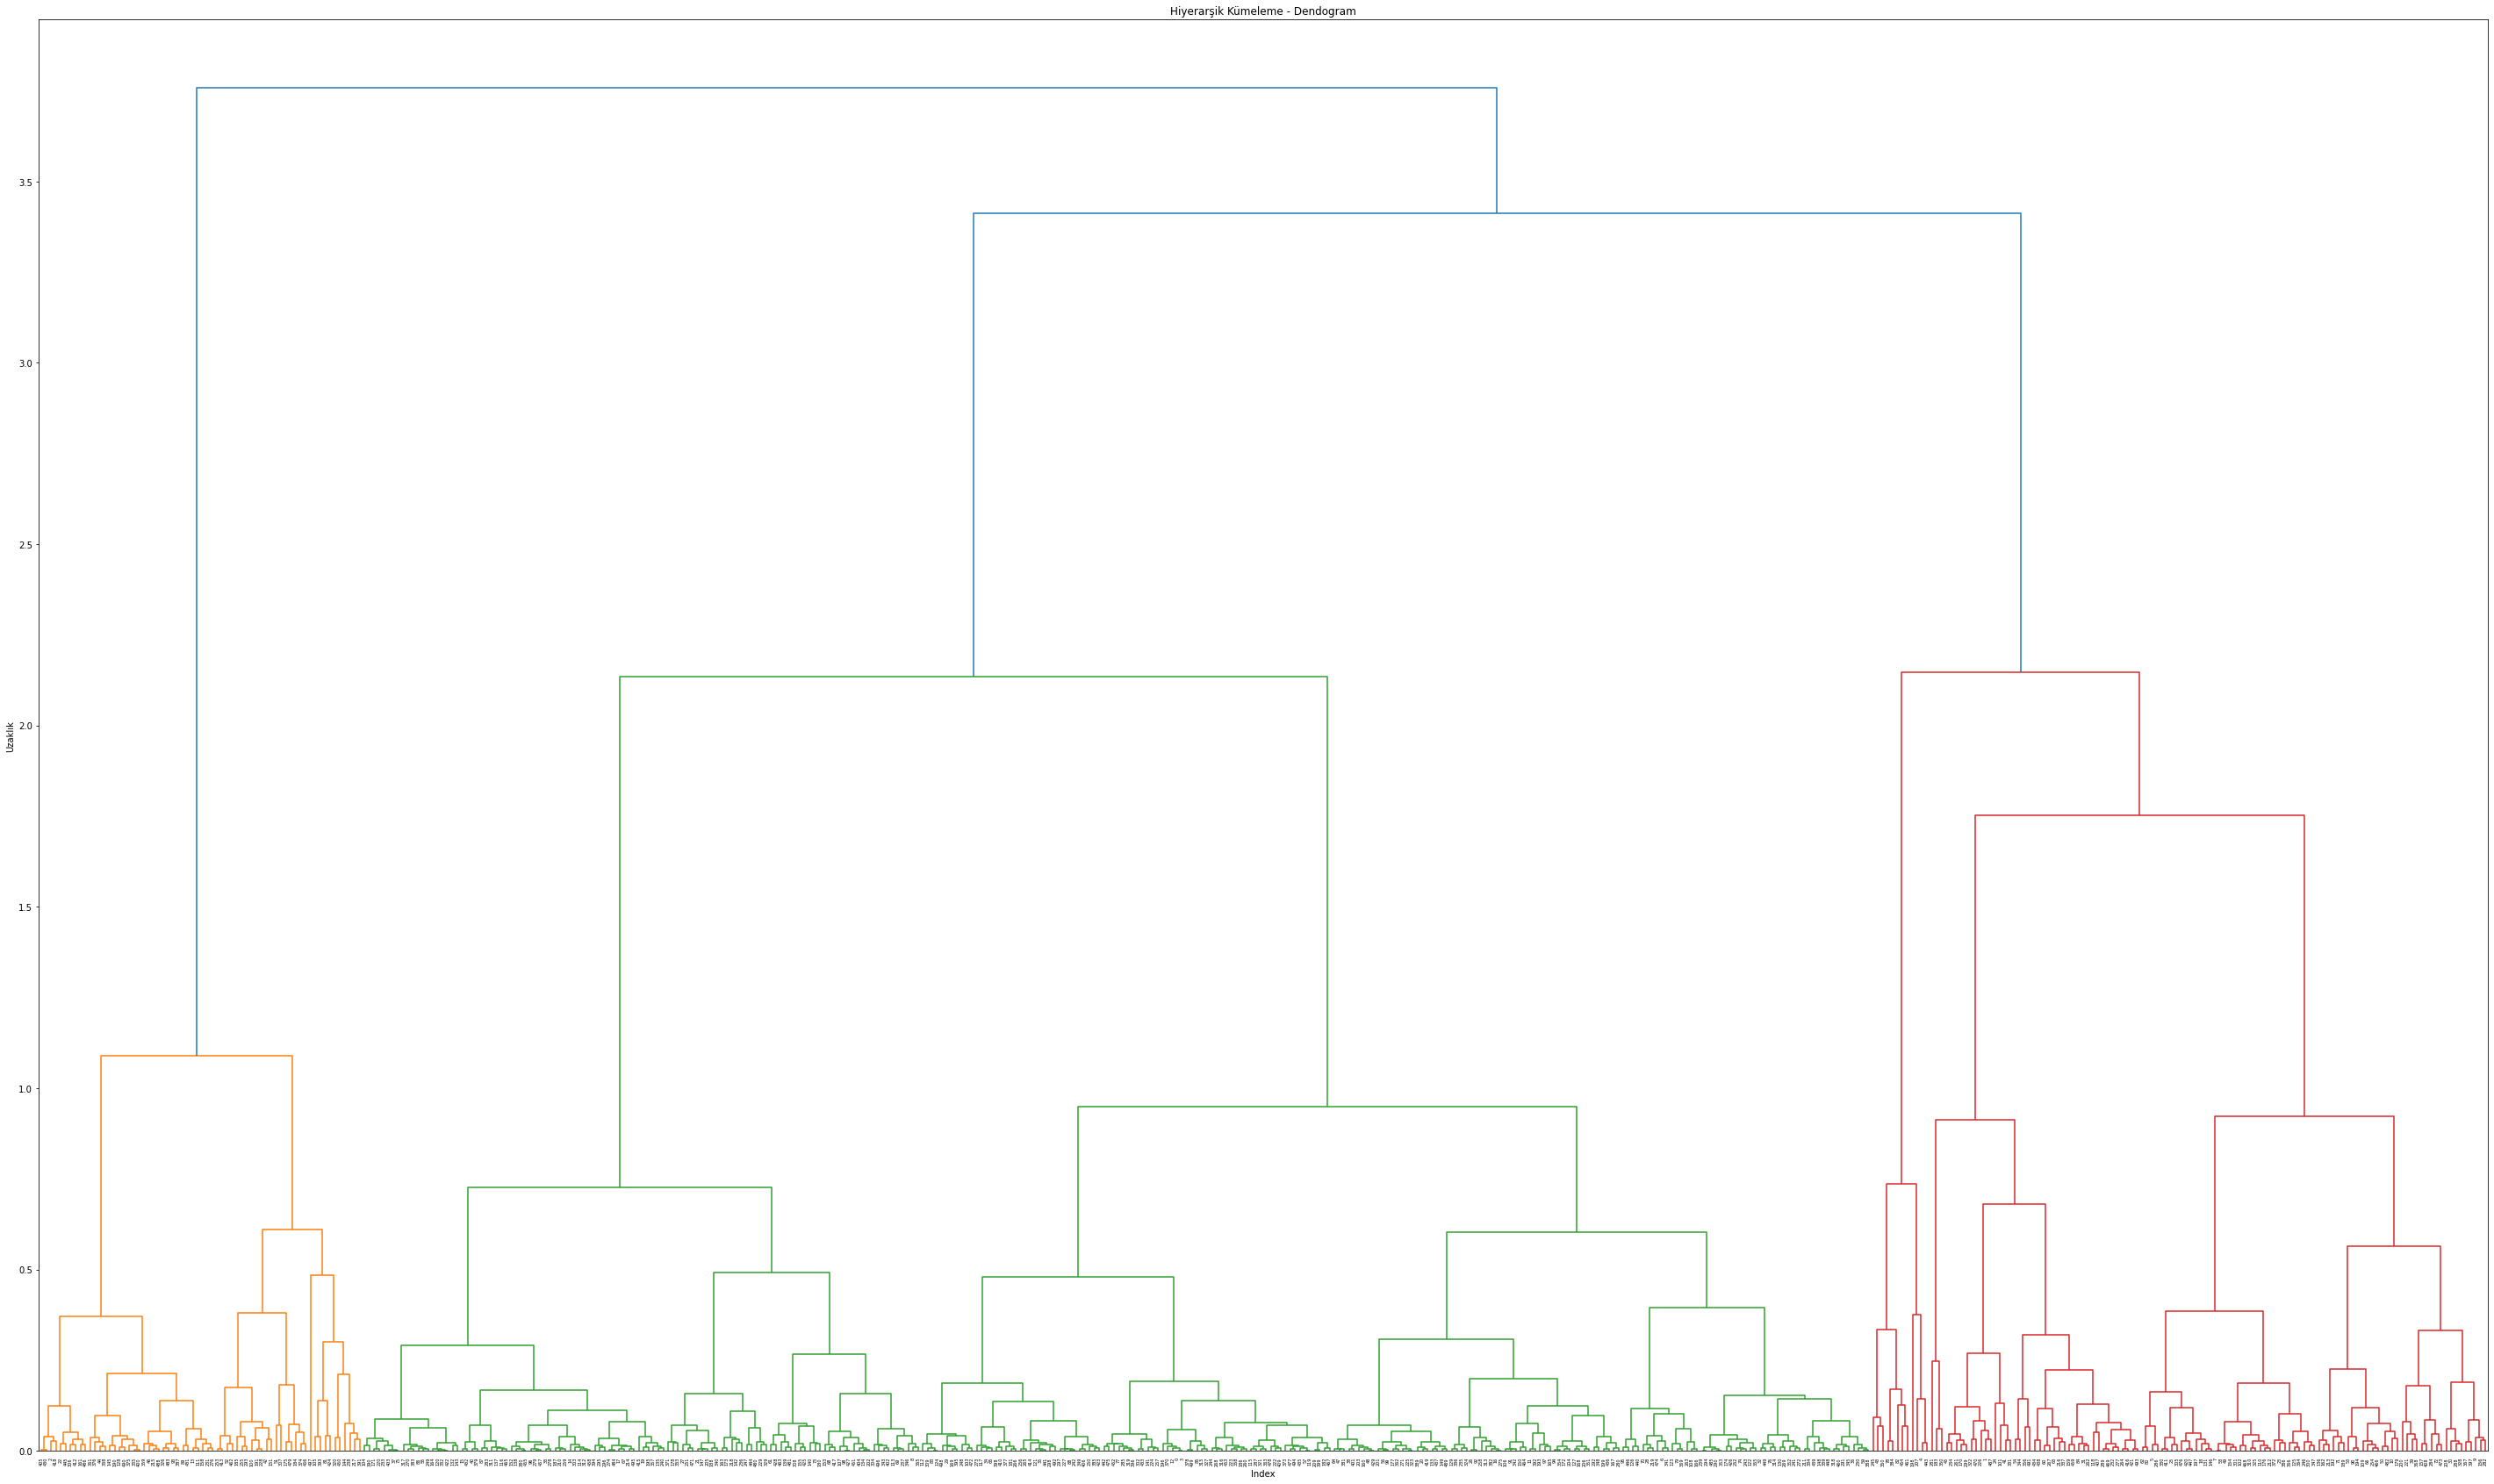

In [94]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (50,30))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
hc_ward,
leaf_font_size=5);

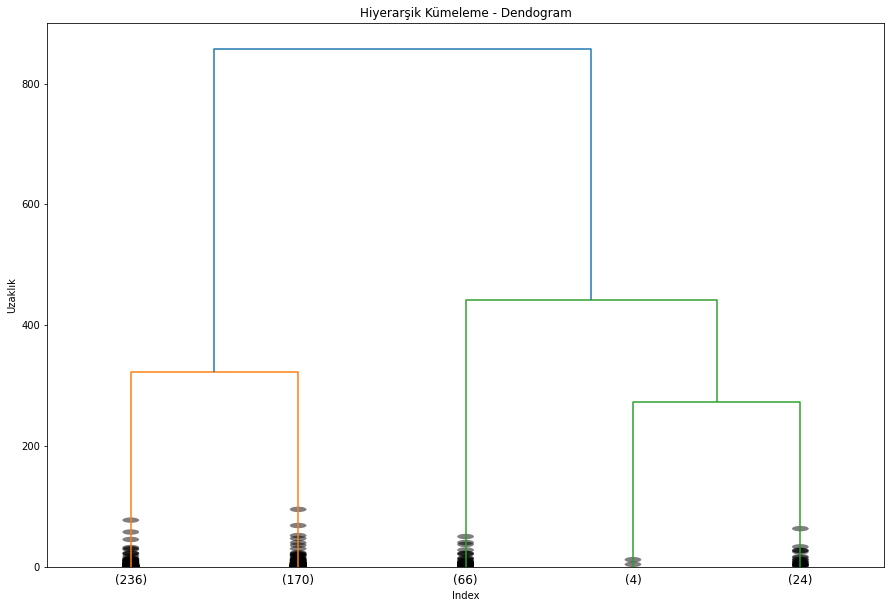

In [54]:
# Dendrogramı budamak;
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
 hc_ward,
 truncate_mode = "lastp",
 p = 5,
 show_contracted = True
);

# Optimum Küme Sayısını Belirleme

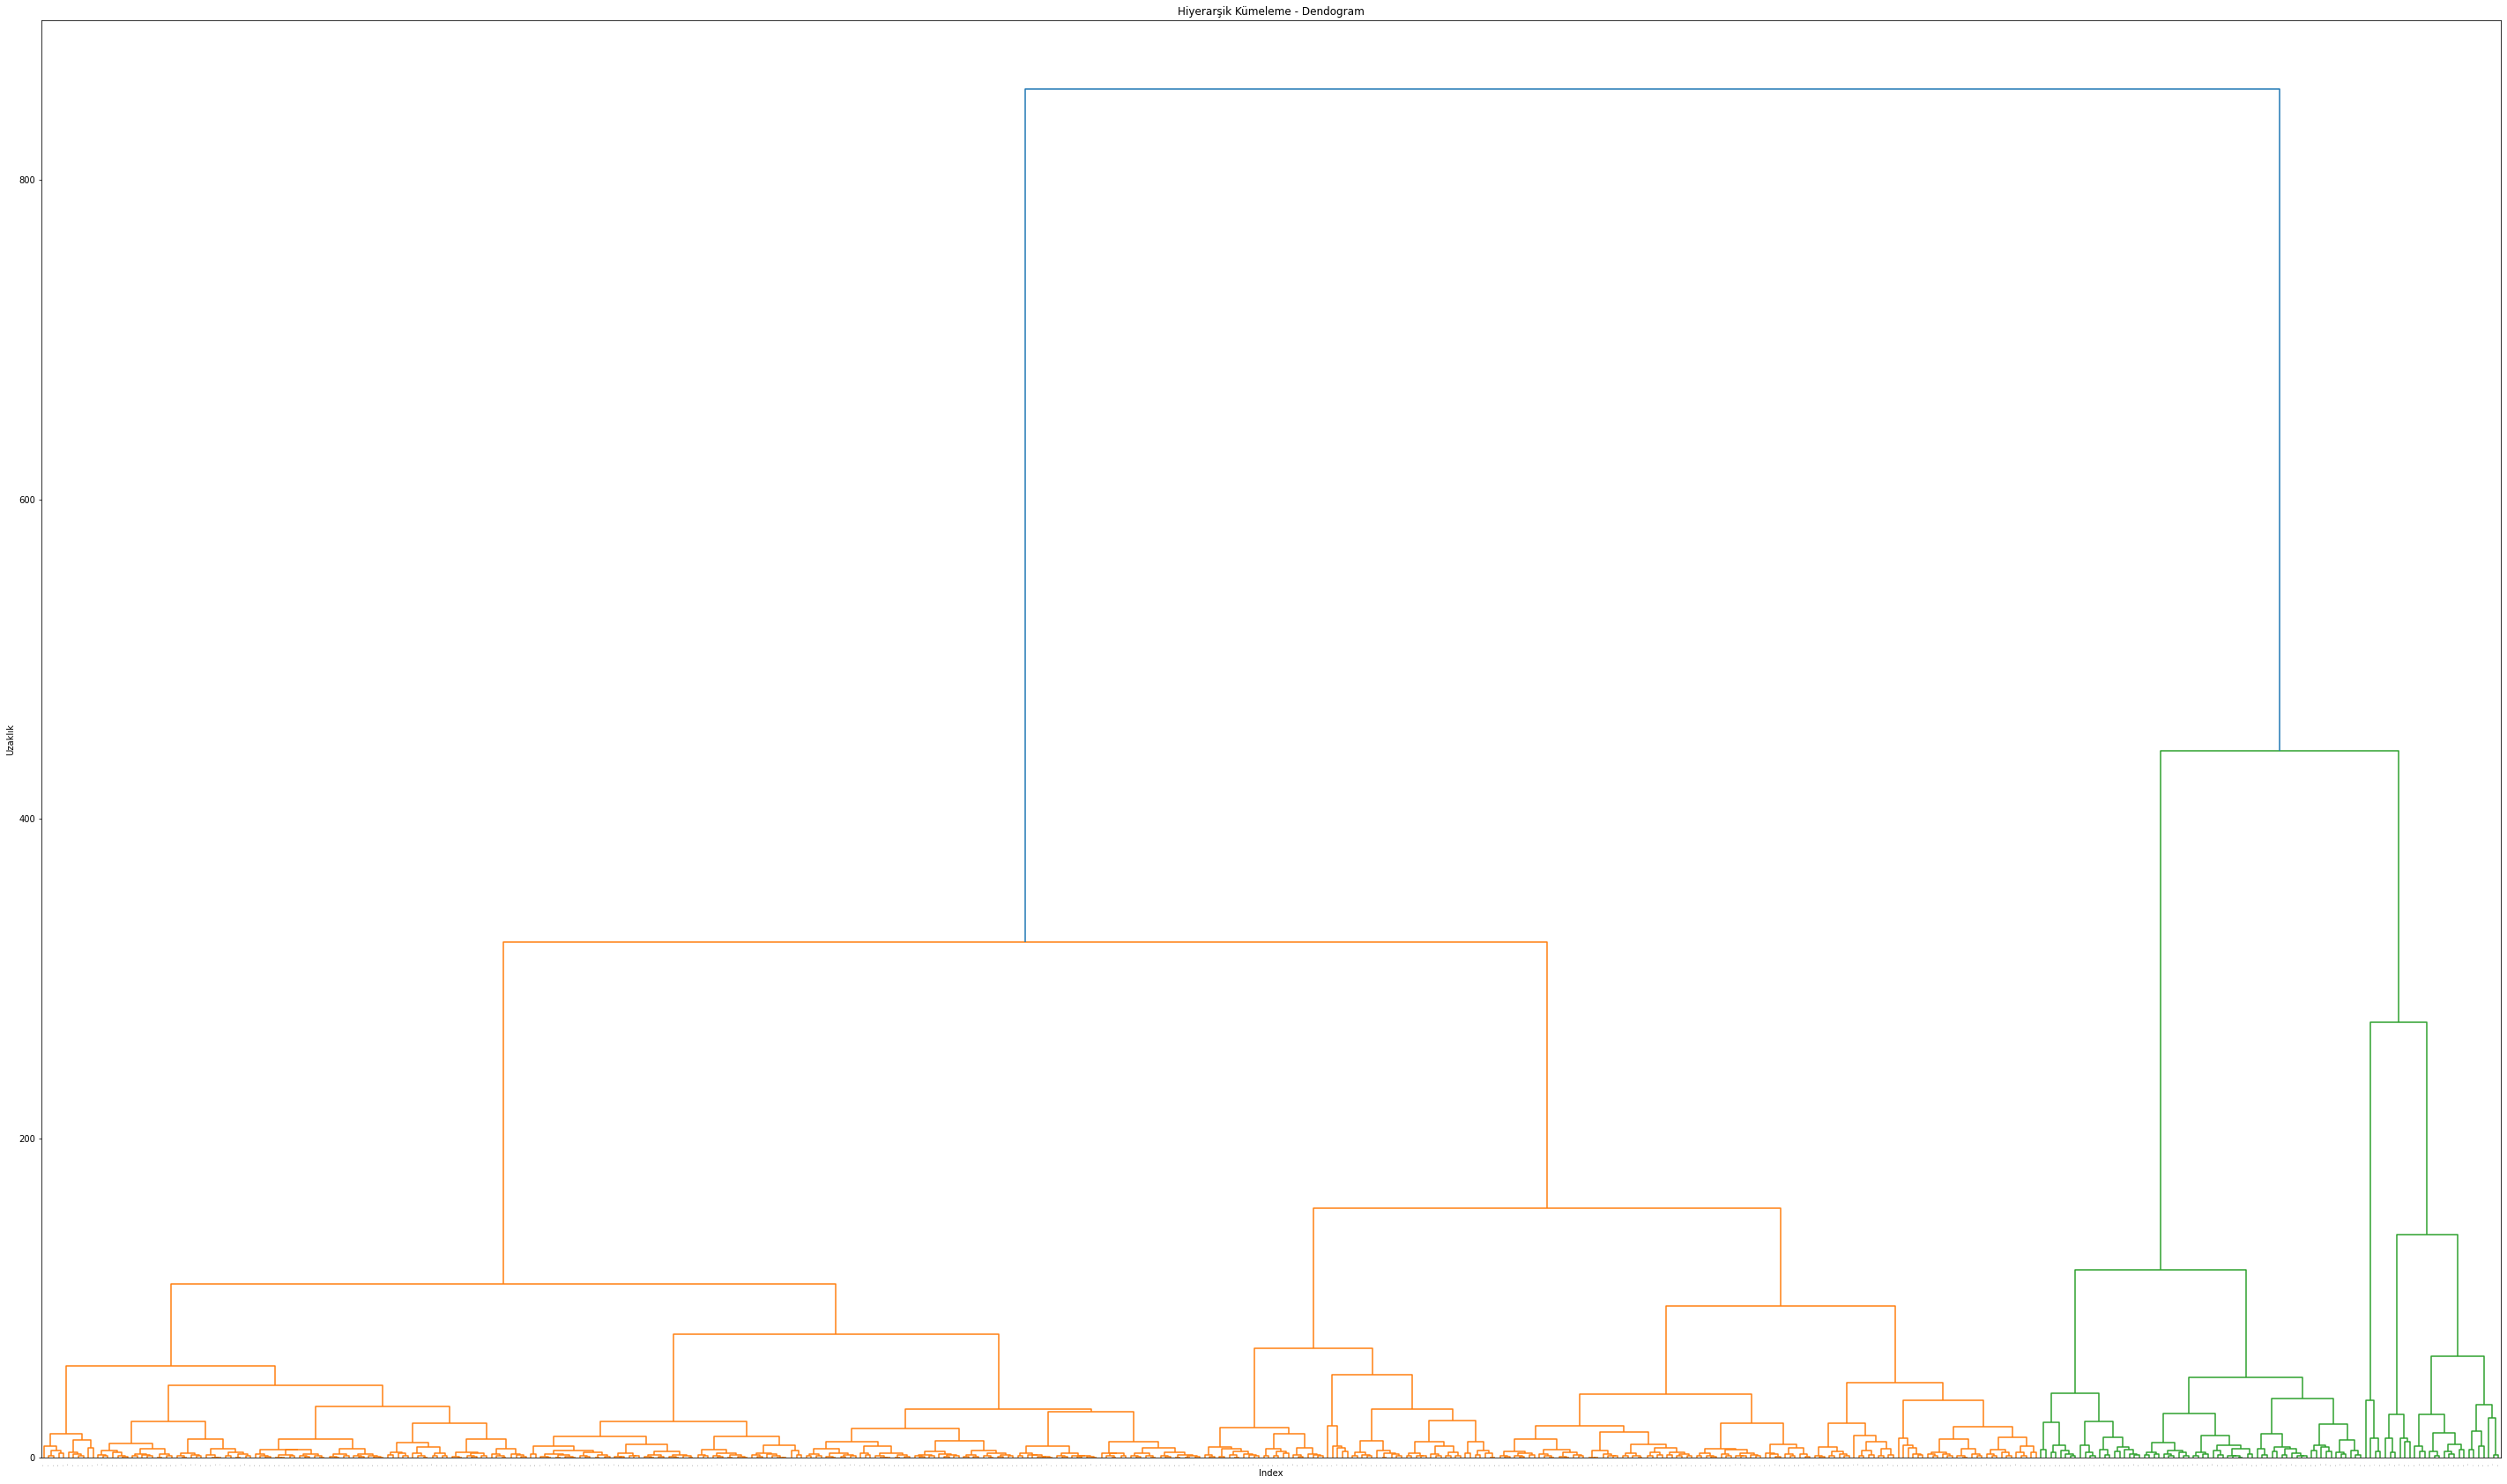

In [55]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (50,30))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
hc_ward,
leaf_font_size=1);

In [56]:
?dendrogram

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4,
                                  affinity = "euclidean",
                                  linkage = "ward")

In [58]:
cluster.fit_predict(df)

array([3, 2, 1, 3, 0, 2, 1, 2, 3, 0, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 2, 0, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 3, 0, 3, 0, 1, 0,
       1, 2, 3, 3, 3, 1, 2, 1, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1,
       2, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 3, 0, 1, 2, 1, 0, 1, 1, 3, 3, 3,
       3, 1, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 0, 1, 1, 3, 1, 3, 3, 1, 2,
       1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3,
       2, 1, 0, 2, 3, 1, 3, 1, 2, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3,
       1, 3, 1, 2, 1, 1, 3, 0, 3, 1, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 2,
       0, 3, 0, 3, 3, 3, 3, 1, 3, 0, 2, 3, 3, 1, 1, 2, 3, 3, 2, 1, 1, 1,
       3, 0, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 3, 1,
       3, 3, 3, 0, 2, 1, 1, 3, 3, 1, 3, 3, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 0, 0, 3, 2, 3,
       2, 3, 2, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 2, 2,

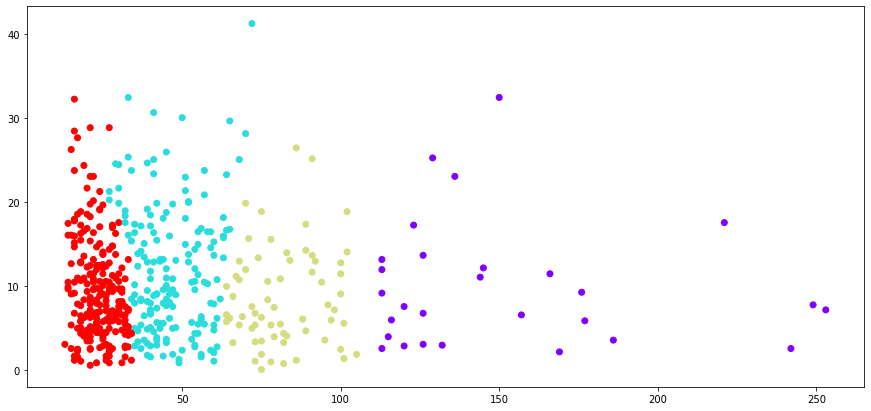

In [59]:

plt.figure(figsize=(15, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

In [60]:
df.head()

,Income,DebtIncomeRatio
1,19,6.3
2,100,12.8
3,57,20.9
4,19,6.3
5,253,7.2


In [61]:
# Min-max normalizasyonu ile hiyerarşik kümeleme

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,46.1480,34.652615,13.0,24.0,34.0,57.0,253.0
DebtIncomeRatio,500.0,10.2204,6.797319,0.1,5.0,8.9,13.9,41.3


In [63]:
df["Income"]= (df["Income"] - 13.0) / (253.0 - 13.0)
df["DebtIncomeRatio"]= (df["DebtIncomeRatio"] - 0.1) / (41.3 - 0.1)

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,0.138117,0.144386,0.0,0.045833,0.087500,0.183333,1.0
DebtIncomeRatio,500.0,0.245641,0.164983,0.0,0.118932,0.213592,0.334951,1.0


In [65]:
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")
hc_average = linkage(df, "average")
hc_single = linkage(df,"single") # metodlar dahil edildi. 
hc_weighted = linkage(df, "weighted")

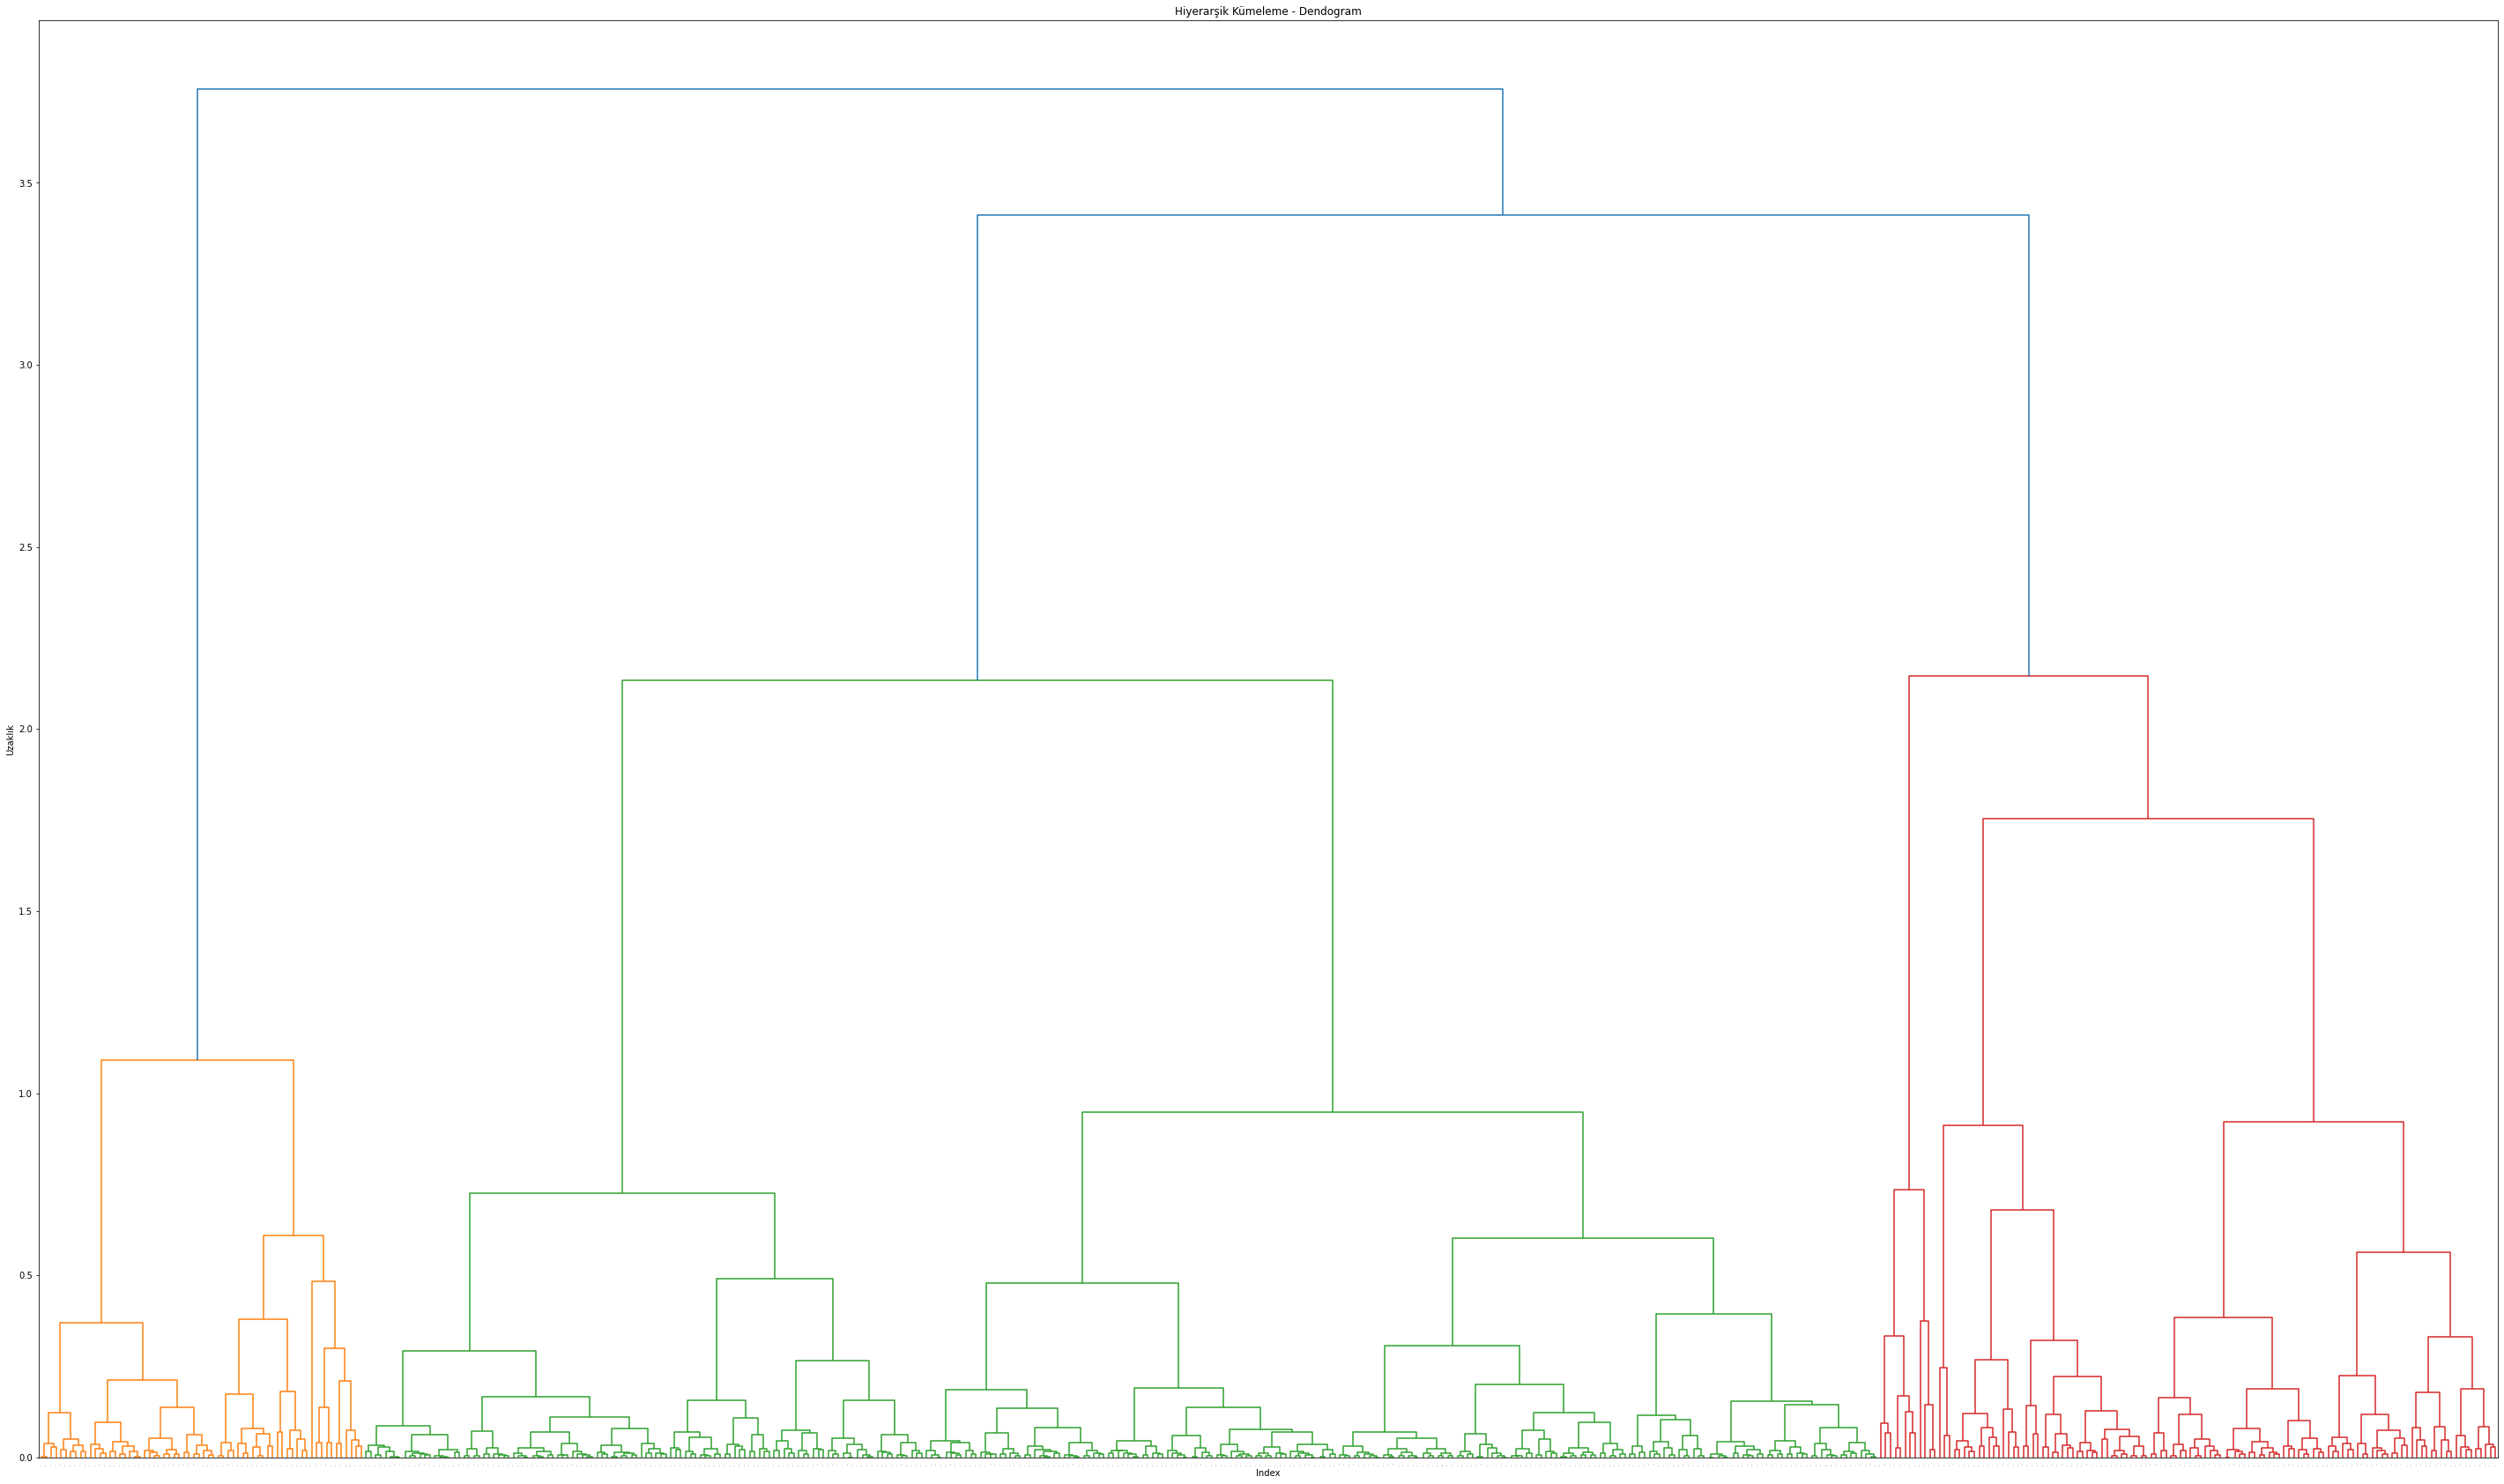

In [66]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (50,30))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
hc_ward,
leaf_font_size=1);

In [67]:
# Dendograma göre 6 kümeye ayrılması daha doğrudur.

In [106]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4,
                                  affinity = "euclidean",
                                  linkage = "ward")
cluster.fit_predict(df)

array([0, 2, 1, 0, 3, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 3,
       1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 2, 1, 3, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2,
       3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2,

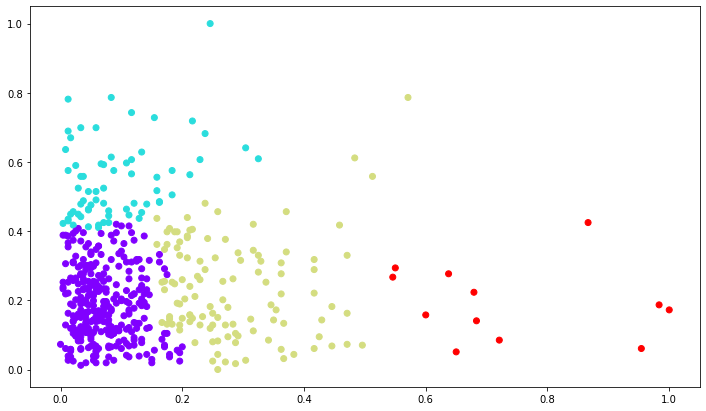

In [107]:
plt.figure(figsize=(12, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')

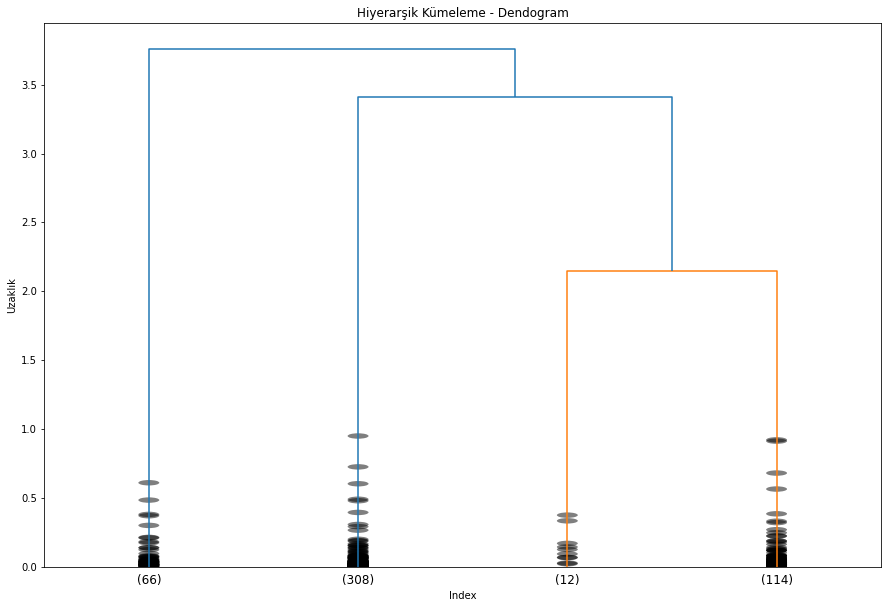

In [24]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
 hc_ward,
 truncate_mode = "lastp",
 p = 4,
 show_contracted = True
);

In [41]:
?AgglomerativeClustering

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,500.0,0.138117,0.144386,0.0,0.045833,0.087500,0.183333,1.0
DebtIncomeRatio,500.0,0.245641,0.164983,0.0,0.118932,0.213592,0.334951,1.0


In [79]:
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")
hc_average = linkage(df, "average")
hc_single = linkage(df,"single") # metodlar dahil edildi. 
hc_weighted = linkage(df, "weighted")

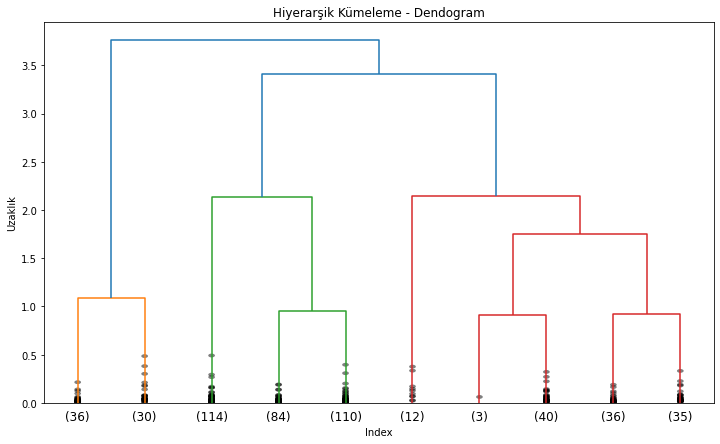

In [103]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (12,7))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
 hc_ward,
 truncate_mode = "lastp",
 p = 10,
 show_contracted = True
);

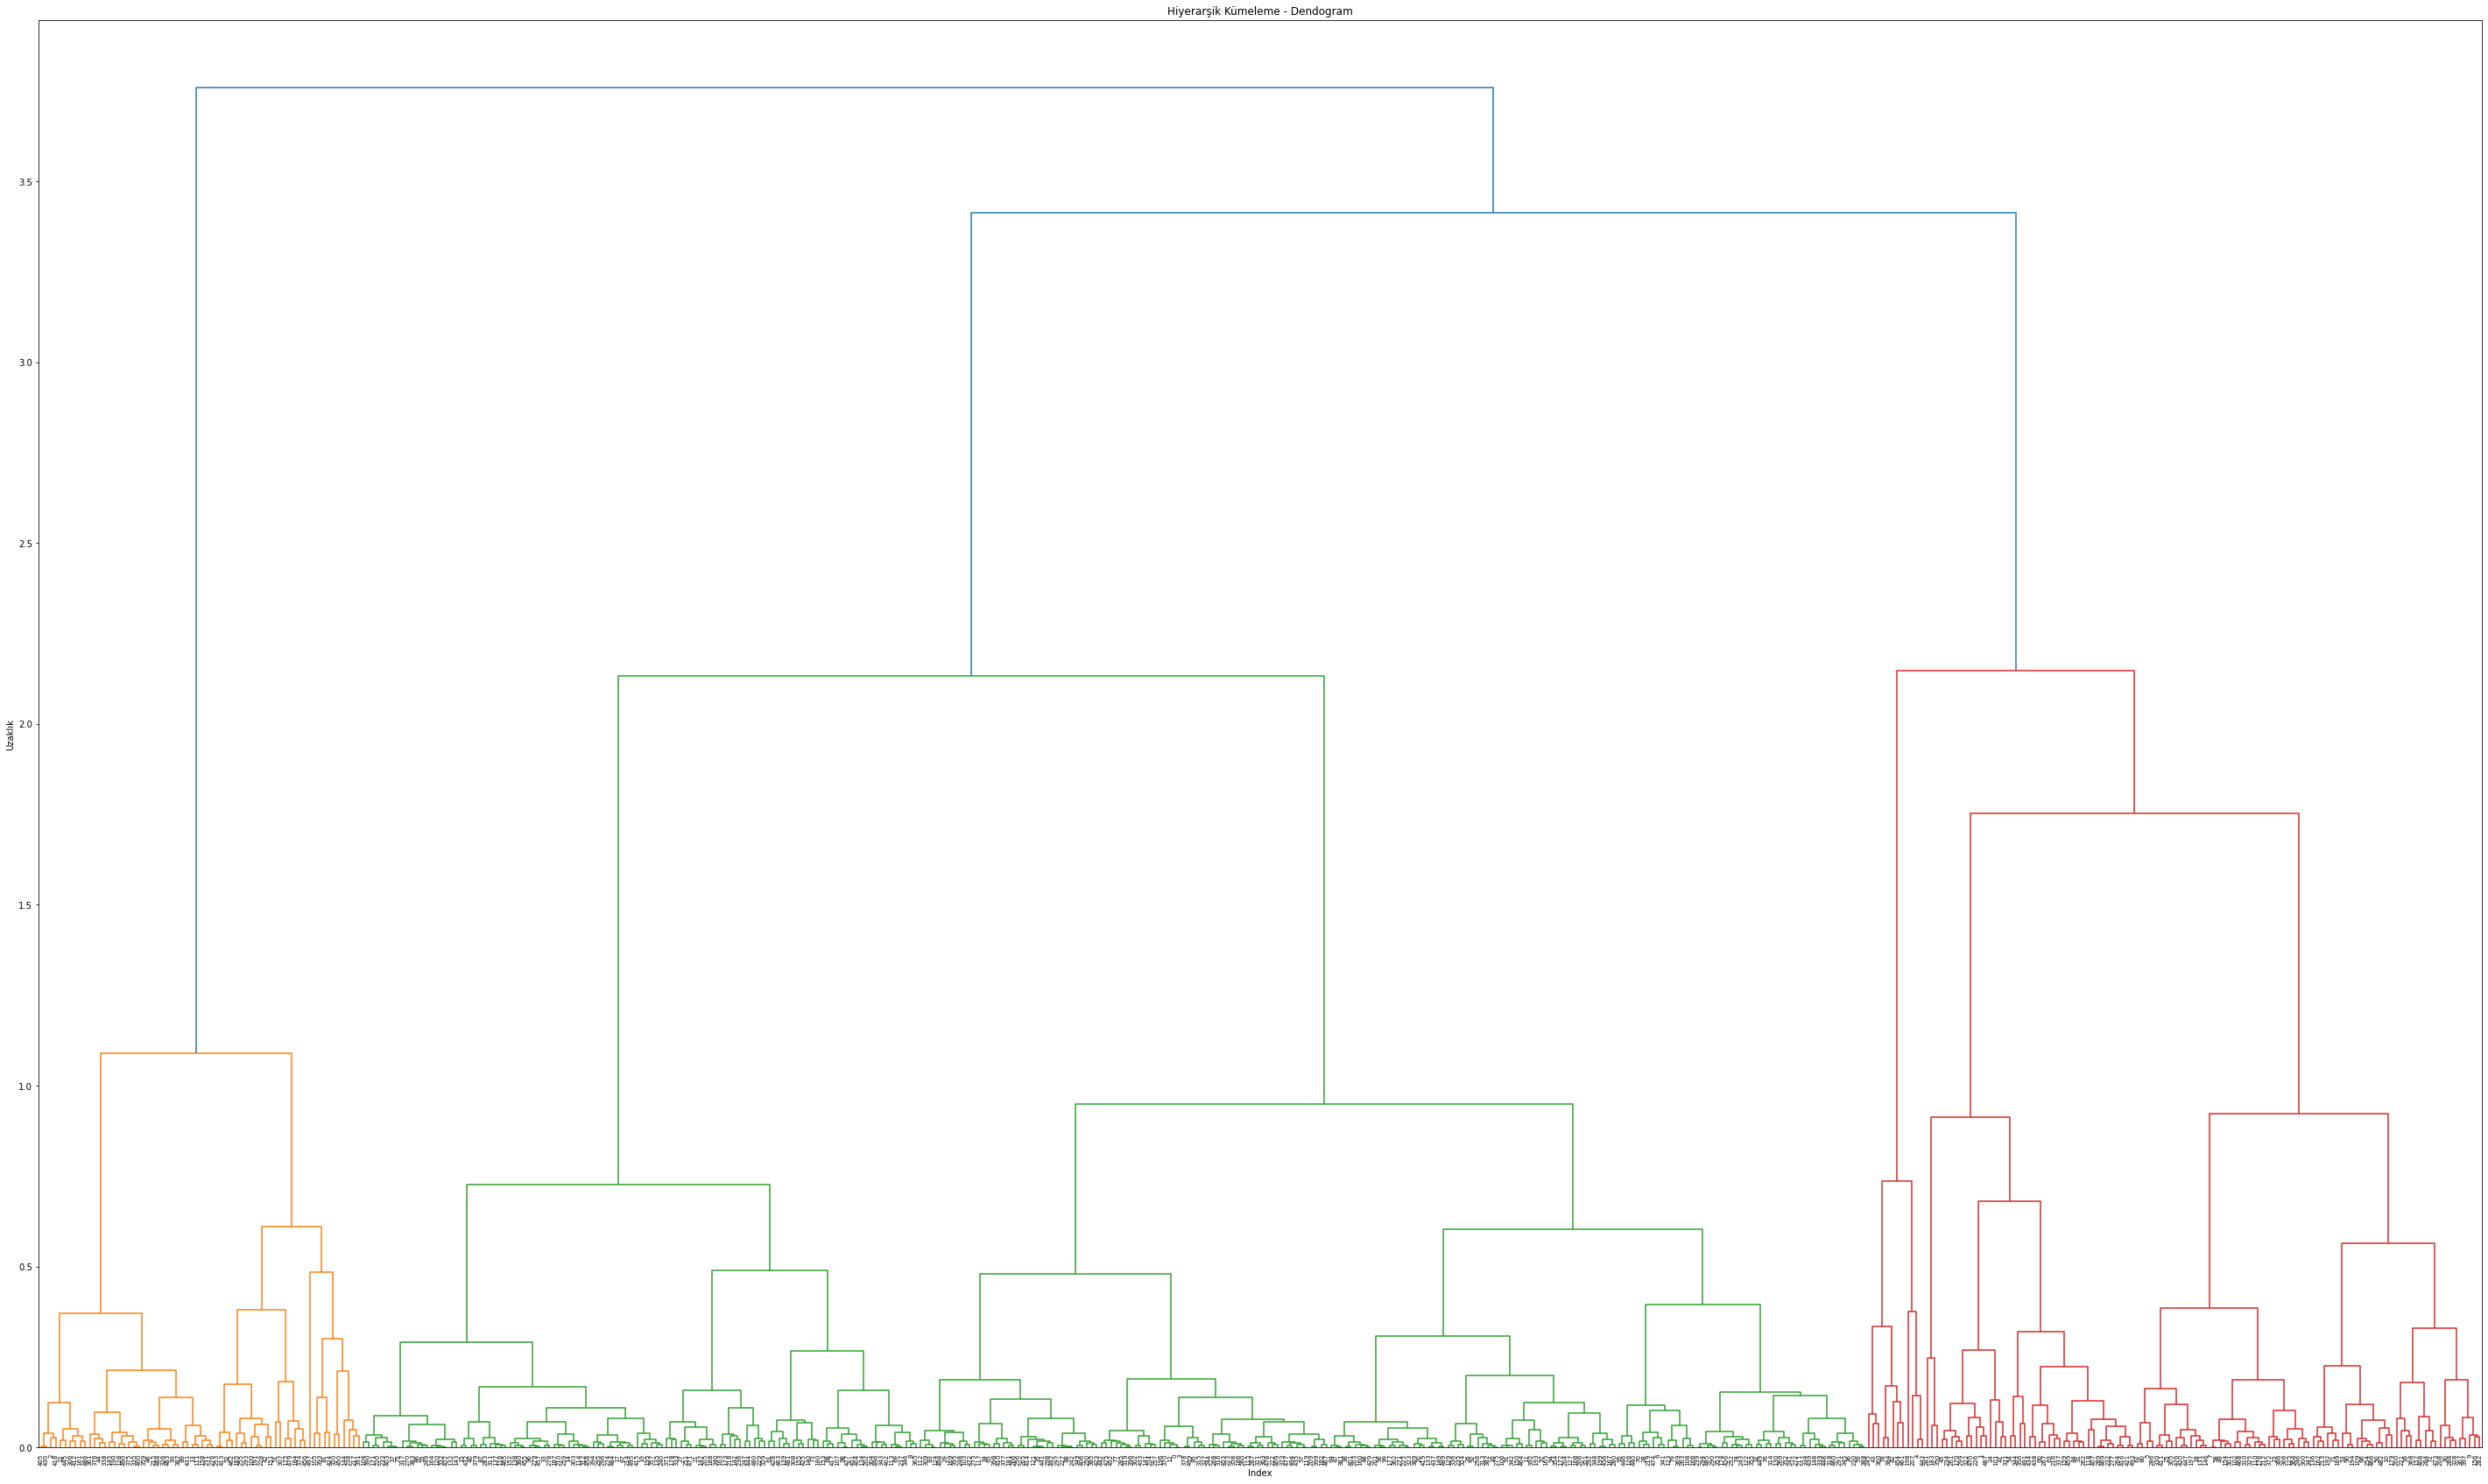

In [96]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (50,30))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel("Index")
plt.ylabel('Uzaklık')
dendrogram(
hc_ward,
leaf_font_size=7);